In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [56]:
df = pd.read_csv('baseball_teams.csv')

In [57]:
df = df.iloc[1343:2655, [0,40,39,5,8,9,14,15,21]]

In [58]:
df.head()

,Year,Team_Name,Fielding_Percentage,Final_Standing,Games_Won,Games_Lost,Runs_Scored,At_Bats,Strike_Outs
1343,1960,Baltimore Orioles,0.98,2,89,65,682,5170,801.0
1344,1960,Boston Red Sox,0.97,7,65,89,658,5215,798.0
1345,1960,Chicago White Sox,0.98,3,87,67,741,5191,648.0
1346,1960,Chicago Cubs,0.97,7,60,94,634,5311,897.0
1347,1960,Cincinnati Reds,0.97,6,67,87,640,5289,858.0


In [59]:
df.tail()

,Year,Team_Name,Fielding_Percentage,Final_Standing,Games_Won,Games_Lost,Runs_Scored,At_Bats,Strike_Outs
2650,2010,St. Louis Cardinals,0.984,2,86,76,736,5542,1027.0
2651,2010,Tampa Bay Rays,0.986,1,96,66,802,5439,1292.0
2652,2010,Texas Rangers,0.982,1,90,72,787,5635,986.0
2653,2010,Toronto Blue Jays,0.985,4,85,77,755,5495,1164.0
2654,2010,Washington Nationals,0.979,5,69,93,655,5418,1220.0


In [60]:
df.describe()

,Year,Fielding_Percentage,Final_Standing,Games_Won,Games_Lost,Runs_Scored,At_Bats,Strike_Outs
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1986.958841,0.976398,3.618902,79.523628,79.523628,703.445884,5427.688262,932.101372
std,14.413946,0.005919,2.001801,12.516572,12.464481,102.107114,364.996582,152.857630
min,1960.000000,0.960000,1.000000,37.000000,40.000000,329.000000,3493.000000,379.000000
25%,1975.000000,0.970000,2.000000,71.000000,71.000000,641.000000,5440.750000,838.750000
50%,1988.000000,0.980000,3.000000,80.000000,79.000000,704.000000,5506.500000,927.000000
75%,2000.000000,0.980000,5.000000,89.000000,88.000000,771.000000,5575.000000,1037.250000
max,2010.000000,0.989000,10.000000,116.000000,120.000000,1009.000000,5781.000000,1529.000000


In [63]:
df = df.rename(columns={'Team_Name':'Team Name', 'Fielding_Percentage':'Fielding Percentage',
                   'Final_Standing':'Final Standing','Games_Won':'Games Won',
                   'Games_Lost':'Games Lost', 'Runs_Scored':'Runs Scored', 
                   'At_Bats':'At Bats', 'Strike_Outs':'Strike Outs'})

In [64]:
df.head()

,Year,Team Name,Fielding Percentage,Final Standing,Games Won,Games Lost,Runs Scored,At Bats,Strike Outs
1343,1960,Baltimore Orioles,0.98,2,89,65,682,5170,801.0
1344,1960,Boston Red Sox,0.97,7,65,89,658,5215,798.0
1345,1960,Chicago White Sox,0.98,3,87,67,741,5191,648.0
1346,1960,Chicago Cubs,0.97,7,60,94,634,5311,897.0
1347,1960,Cincinnati Reds,0.97,6,67,87,640,5289,858.0


In [66]:
df.isna().sum()

Year                   0
Team Name              0
Fielding Percentage    0
Final Standing         0
Games Won              0
Games Lost             0
Runs Scored            0
At Bats                0
Strike Outs            0
dtype: int64

In [68]:
df.loc[df.duplicated()]

,Year,Team Name,Fielding Percentage,Final Standing,Games Won,Games Lost,Runs Scored,At Bats,Strike Outs


In [71]:
df.loc[df.duplicated(subset=['Team Name'])]

,Year,Team Name,Fielding Percentage,Final Standing,Games Won,Games Lost,Runs Scored,At Bats,Strike Outs
1359,1961,Baltimore Orioles,0.980,3,95,67,691,5481,902.0
1360,1961,Boston Red Sox,0.970,6,76,86,729,5508,847.0
1361,1961,Chicago White Sox,0.980,4,86,76,765,5556,612.0
1362,1961,Chicago Cubs,0.970,7,64,90,689,5344,1027.0
1363,1961,Cincinnati Reds,0.970,1,93,61,710,5243,761.0
...,...,...,...,...,...,...,...,...,...
2650,2010,St. Louis Cardinals,0.984,2,86,76,736,5542,1027.0
2651,2010,Tampa Bay Rays,0.986,1,96,66,802,5439,1292.0
2652,2010,Texas Rangers,0.982,1,90,72,787,5635,986.0
2653,2010,Toronto Blue Jays,0.985,4,85,77,755,5495,1164.0


In [79]:
df['Final Standing'].value_counts()

2     228
4     222
3     220
1     220
5     195
6     130
7      50
8      18
9      15
10     14
Name: Final Standing, dtype: int64

In [80]:
df['Games Won'].value_counts()

83     49
86     47
76     46
79     44
85     43
       ..
106     1
114     1
116     1
43      1
105     1
Name: Games Won, Length: 70, dtype: int64

In [104]:
df.describe()

,Year,Fielding Percentage,Final Standing,Games Won,Games Lost,Runs Scored,At Bats,Strike Outs
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1986.958841,0.976398,3.618902,79.523628,79.523628,703.445884,5427.688262,932.101372
std,14.413946,0.005919,2.001801,12.516572,12.464481,102.107114,364.996582,152.857630
min,1960.000000,0.960000,1.000000,37.000000,40.000000,329.000000,3493.000000,379.000000
25%,1975.000000,0.970000,2.000000,71.000000,71.000000,641.000000,5440.750000,838.750000
50%,1988.000000,0.980000,3.000000,80.000000,79.000000,704.000000,5506.500000,927.000000
75%,2000.000000,0.980000,5.000000,89.000000,88.000000,771.000000,5575.000000,1037.250000
max,2010.000000,0.989000,10.000000,116.000000,120.000000,1009.000000,5781.000000,1529.000000


<Axes: title={'center': 'Games Won Distribution'}, ylabel='Frequency'>

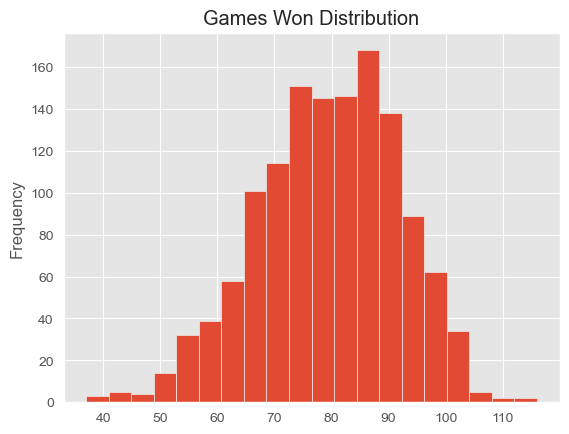

In [88]:
df['Games Won'].plot(kind='hist', bins=20, title='Games Won Distribution')
    

Text(0.5, 0, 'Rank(Place)')

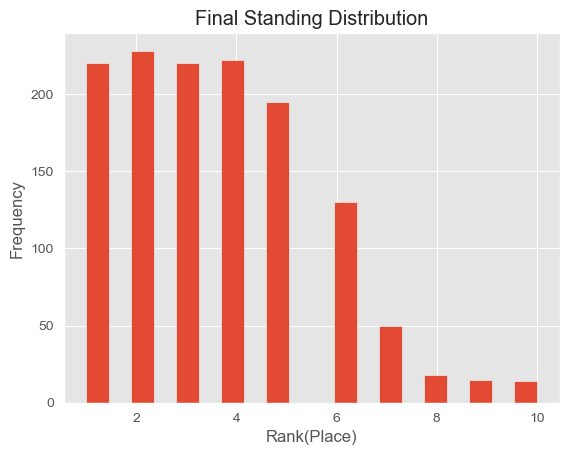

In [97]:
ax = df['Final Standing'].plot(kind='hist', bins=20, title='Final Standing Distribution')
ax.set_xlabel('Rank(Place)')

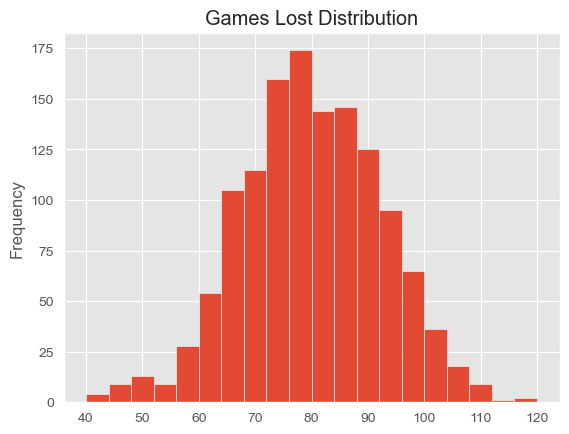

In [99]:
ax = df['Games Lost'].plot(kind='hist', bins=20, title='Games Lost Distribution')

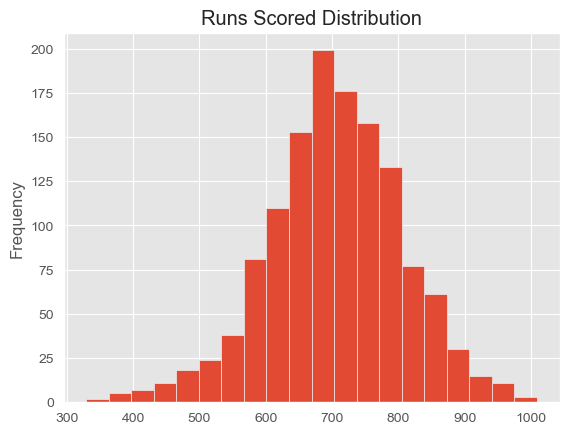

In [100]:
ax = df['Runs Scored'].plot(kind='hist', bins=20, title='Runs Scored Distribution')

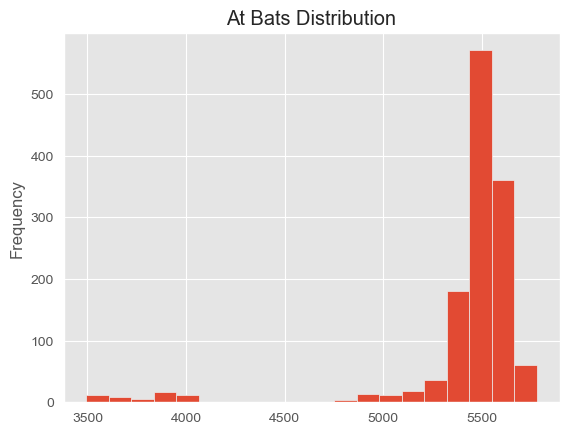

In [101]:
ax = df['At Bats'].plot(kind='hist', bins=20, title='At Bats Distribution')

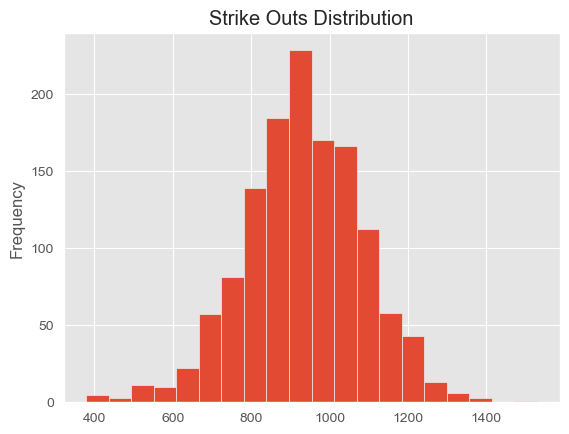

In [103]:
ax = df['Strike Outs'].plot(kind='hist', bins=20, title='Strike Outs Distribution')

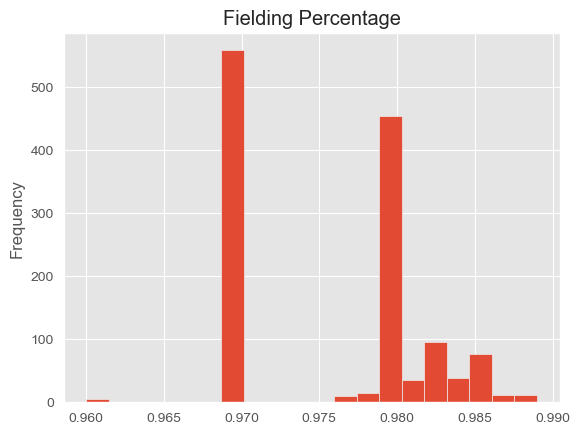

In [108]:
ax = df['Fielding Percentage'].plot(kind='hist', bins=20, title='Fielding Percentage')

### Comments on the shape distibution:


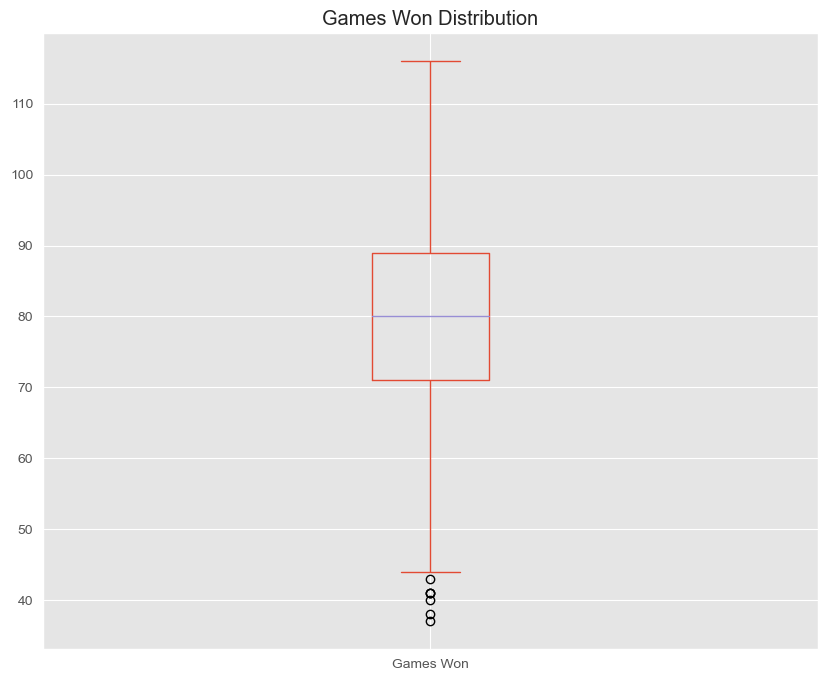

In [107]:
df['Games Won'].plot(kind='box', title='Games Won Distribution', figsize=(10,8))
plt.show()

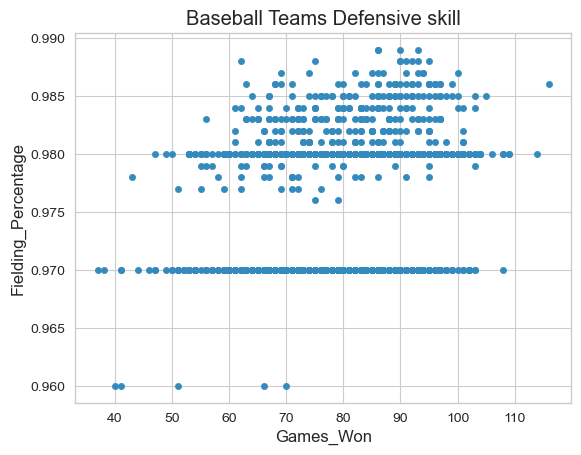

In [33]:
df.plot(kind='scatter', 
       x='Games_Won',
       y='Fielding_Percentage',
       title='Baseball Teams Defensive skill')
plt.show()

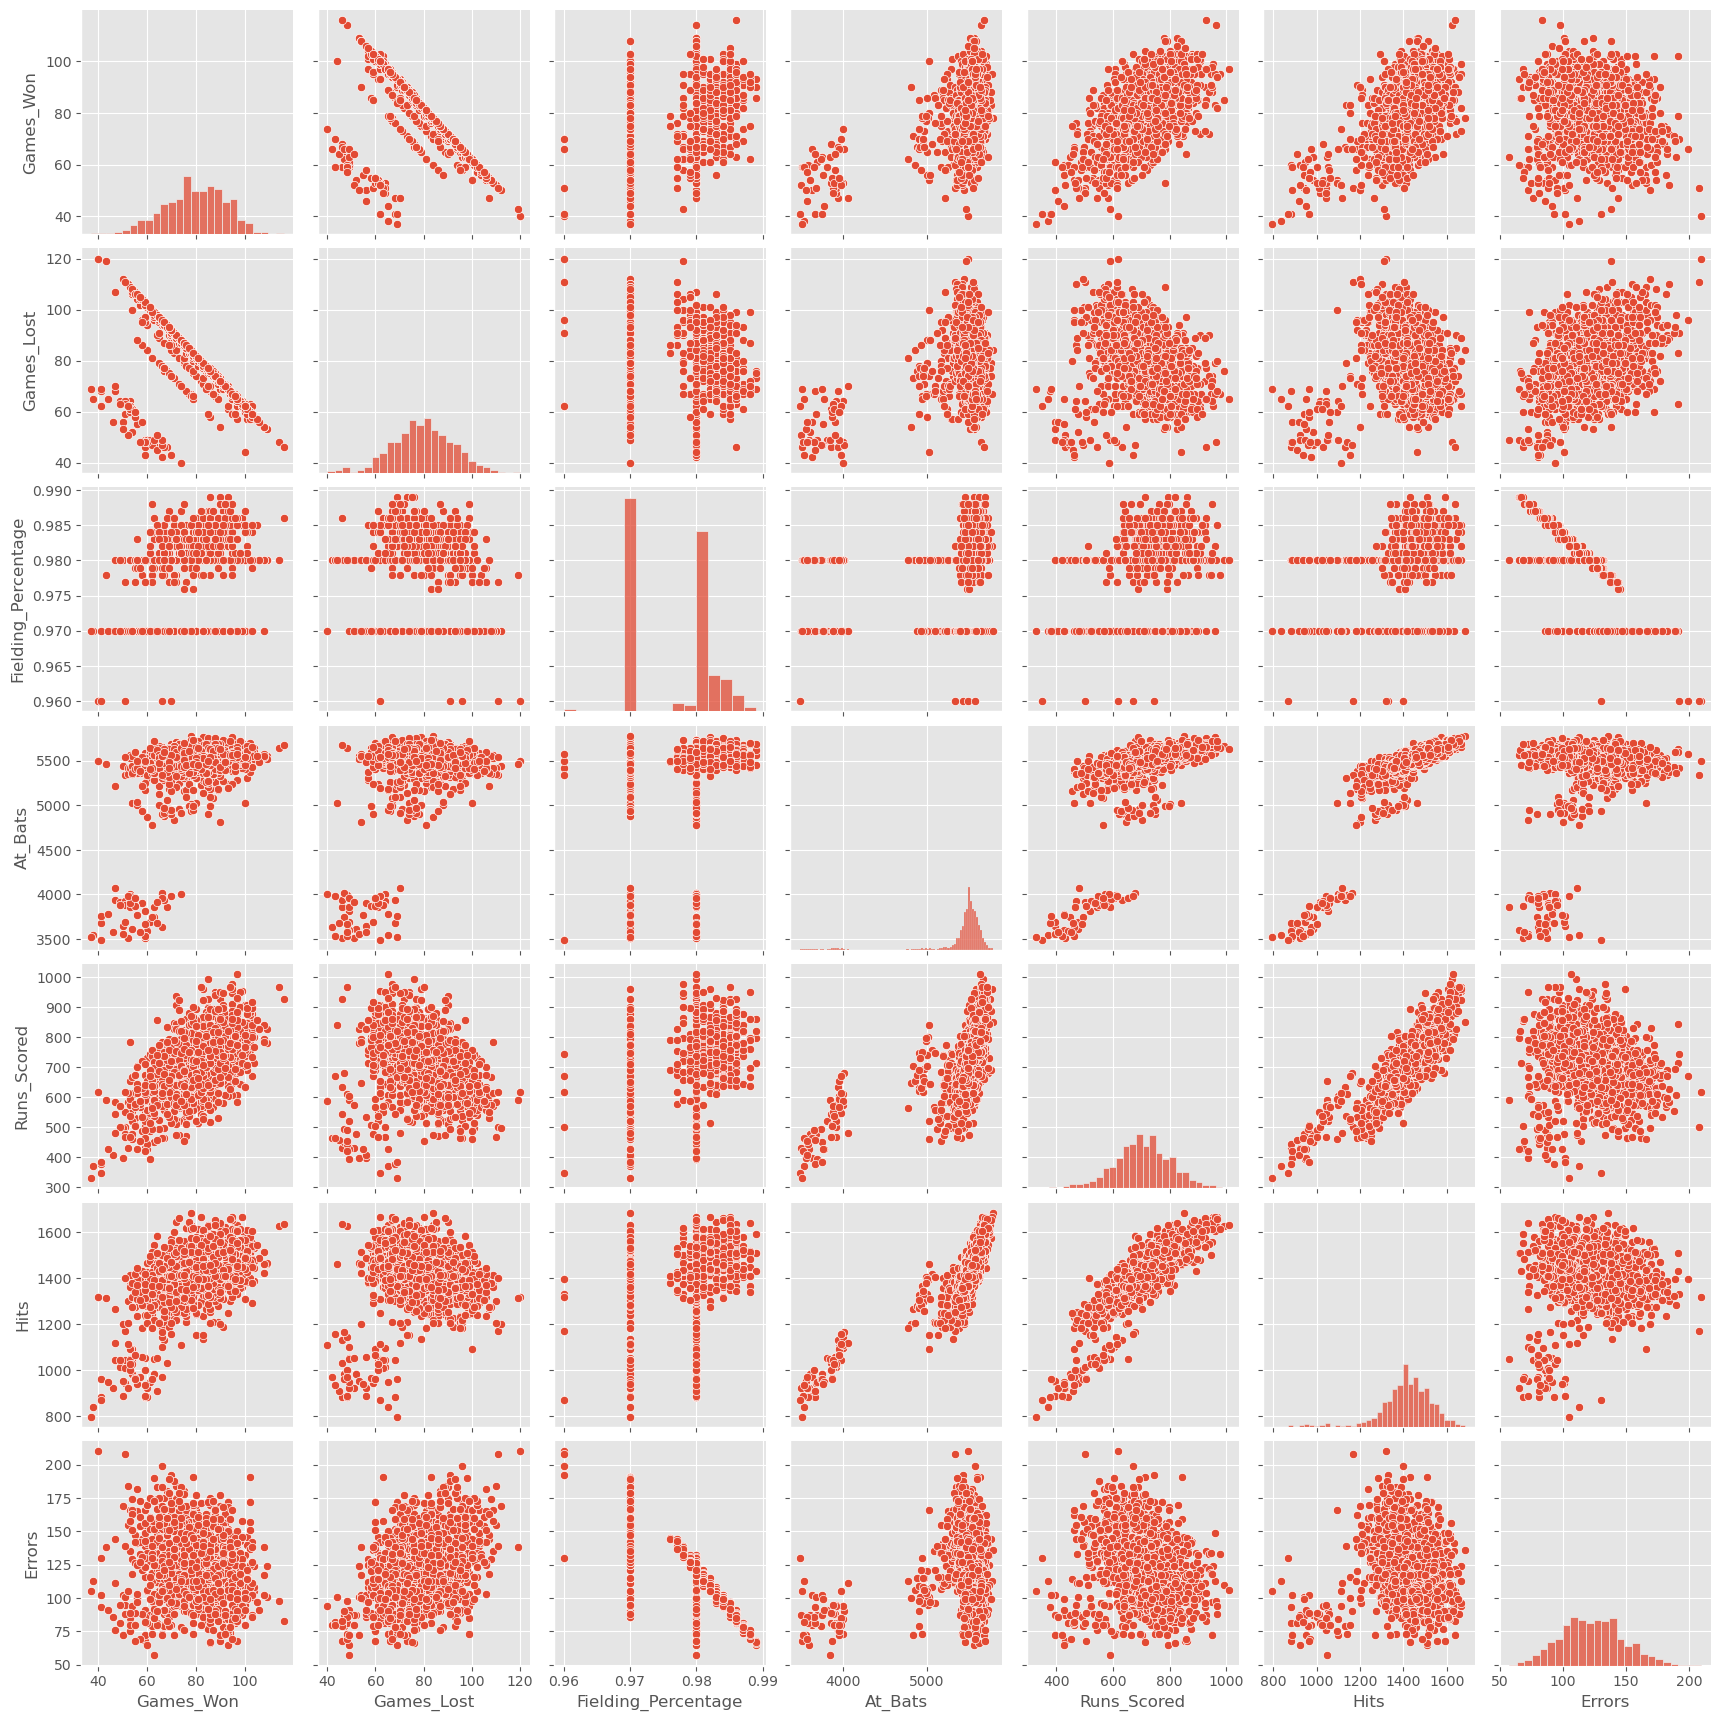

In [17]:
sns.pairplot(df, vars=['Games_Won','Games_Lost','Fielding_Percentage',
                       'At_Bats','Runs_Scored','Hits','Errors'])
plt.show()